In [1]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

### Hetereoscedastic dataset

We use an artifical dataset on which we can create and observe our linear models. We will consider a heteroscedastic model in order to be able to differentiate between OLS and WLS.

The created the model with a few assumptions as below:

* Misspecification: The true model is quadratic (has a squared term)
* Ae estimate only the linear part and try to see the best fit line's accuracy
* It has an independent noise/error term
* Error variance is not equal for all data points
* Two groups for error variance, low and high variance groups

In [3]:
np.random.seed(1113)

num = 50

In [4]:
x = np.linspace(0, 20, num)
X = np.column_stack((x, (x - 5)**2))

In [5]:
X [:10]

array([[ 0.        , 25.        ],
       [ 0.40816327, 21.0849646 ],
       [ 0.81632653, 17.5031237 ],
       [ 1.2244898 , 14.2544773 ],
       [ 1.63265306, 11.33902541],
       [ 2.04081633,  8.75676801],
       [ 2.44897959,  6.50770512],
       [ 2.85714286,  4.59183673],
       [ 3.26530612,  3.00916285],
       [ 3.67346939,  1.75968347]])

If we now fit the regression line, we are forcing it to pass through the origin (0,0). As this will bias the results, we add an intercept to our data.

In [6]:
X = sm.add_constant(X)

X[:10]

array([[ 1.        ,  0.        , 25.        ],
       [ 1.        ,  0.40816327, 21.0849646 ],
       [ 1.        ,  0.81632653, 17.5031237 ],
       [ 1.        ,  1.2244898 , 14.2544773 ],
       [ 1.        ,  1.63265306, 11.33902541],
       [ 1.        ,  2.04081633,  8.75676801],
       [ 1.        ,  2.44897959,  6.50770512],
       [ 1.        ,  2.85714286,  4.59183673],
       [ 1.        ,  3.26530612,  3.00916285],
       [ 1.        ,  3.67346939,  1.75968347]])

### Creating our regression relationship

* The y_true is calculated by assuming certain coefficients for each term
* constant = 5, X term = 0.5, exponential term = -0.1

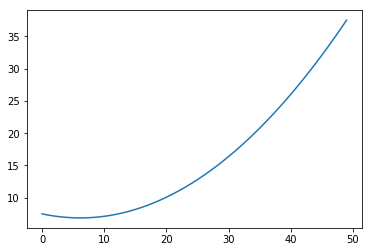

In [7]:
coefficients = [5., 0.5, 0.1]
y_true = np.dot(X, coefficients)

plt.plot(y_true)

### Create an artificial error term

* Standard deviation sig= 0.3
* The error term which increases gradually
* Weight w which is unequally distributed

In [8]:
sig = 0.3

e = np.random.normal(size=num)

w = np.ones(num)          
w[num * 6//10:] = 3

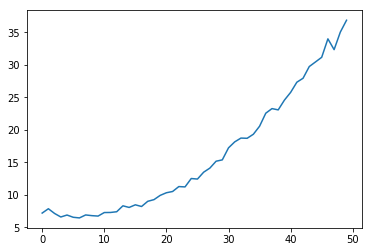

In [9]:
y = y_true + sig * w * e

plt.plot(y)

### Use an estimate of the real model

* Drop the exponential term for our linear regression models
* Use only the constant and the random term

In [10]:
X = X[:,[0,1]]

X[:10]

array([[1.        , 0.        ],
       [1.        , 0.40816327],
       [1.        , 0.81632653],
       [1.        , 1.2244898 ],
       [1.        , 1.63265306],
       [1.        , 2.04081633],
       [1.        , 2.44897959],
       [1.        , 2.85714286],
       [1.        , 3.26530612],
       [1.        , 3.67346939]])

## Regression using Ordinary Least Squares (OLS)

In [11]:
model_ols = sm.OLS(y, X)
results_ols = model_ols.fit()

print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     429.6
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.36e-25
Time:                        17:21:30   Log-Likelihood:                -124.37
No. Observations:                  50   AIC:                             252.7
Df Residuals:                      48   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1324      0.828      1.368      0.1

In [12]:
results_ols.resid

array([ 6.07448723,  6.1371038 ,  4.80751783,  3.6633183 ,  3.36028064,
        2.41227387,  1.71004532,  1.5626865 ,  0.85201736,  0.18353413,
        0.12221672, -0.46886311, -0.96022958, -0.65229901, -1.50659014,
       -1.70606587, -2.56813546, -2.37363556, -2.72052389, -2.66922901,
       -2.86825281, -3.27887969, -3.12673642, -3.780456  , -3.09396697,
       -3.78139748, -3.32632291, -3.30149417, -2.84774772, -3.24569448,
       -1.99948505, -1.68497001, -1.70509723, -2.34116921, -2.32262207,
       -1.6944228 , -0.29338028, -0.19012059, -0.99089989, -0.09358738,
        0.49256083,  1.45210443,  1.45752385,  2.652959  ,  2.75699738,
        2.8683479 ,  5.10048506,  2.84108069,  4.93250136,  6.15223258])

### Plotting linear relationship using OLS

* wls-prediction_std to calculate standard deviation and confidence interval
* stderpr_ols is the standard error of prediction
* int_ols_u and int-ols_l are the upper and lower confidence bounds
* Fitted values are the predictions from OLS

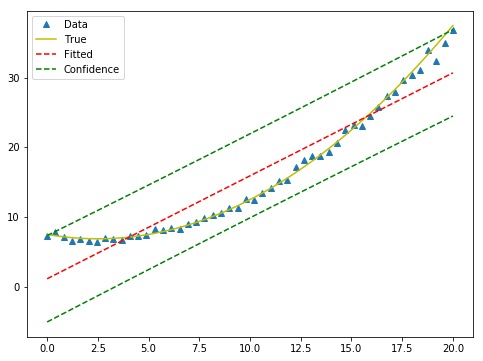

In [13]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

stderpr_ols, int_ols_l, int_ols_u = wls_prediction_std(results_ols)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, '^', label="Data")
ax.plot(x, y_true, 'y-', label="True")

ax.plot(x, results_ols.fittedvalues, 'r--', label='Fitted')

ax.plot(x, int_ols_u, 'g--', label="Confidence")
ax.plot(x, int_ols_l, 'g--')

ax.legend(loc="best")

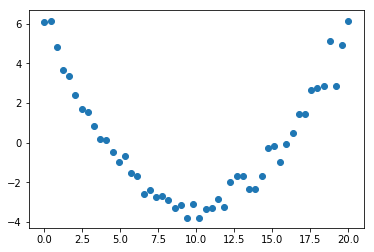

In [14]:
plt.scatter(x, results_ols.resid)

## Regression using Weighted Least Squares (WLS)

In [15]:
model_wls = sm.WLS(y, X)
results_wls = model_wls.fit()

print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            WLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     429.6
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.36e-25
Time:                        17:21:30   Log-Likelihood:                -124.37
No. Observations:                  50   AIC:                             252.7
Df Residuals:                      48   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1324      0.828      1.368      0.1

The WLS results seem identical to the ones obtained by the OLS method. Let's consider the true variance ratio of heteroscedasticity (**heterescedasticity * w**) in our WLS approximation.

In [16]:
model_wls_w = sm.WLS(y, X, weights=1./(w))
results_wls_w = model_wls_w.fit()

print(results_wls_w.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            WLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     274.0
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.79e-21
Time:                        17:21:30   Log-Likelihood:                -125.90
No. Observations:                  50   AIC:                             255.8
Df Residuals:                      48   BIC:                             259.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1961      0.734      2.994      0.0

We see that the results from the WLS model now differ slightly differ from that given by the OLS model.

Let's try to visually see what this WLS prediction looks like.

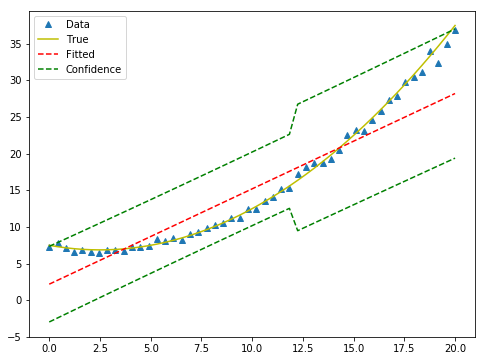

In [17]:
stderpr_wls, int_wls_l, int_wls_u = wls_prediction_std(results_wls_w)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, '^', label="Data")
ax.plot(x, y_true, 'y-', label="True")

ax.plot(x, results_wls_w.fittedvalues, 'r--', label='Fitted')

ax.plot(x, int_wls_u, 'g--', label="Confidence")
ax.plot(x, int_wls_l, 'g--')

ax.legend(loc="best");

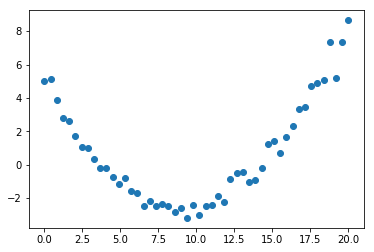

In [18]:
plt.scatter(x, results_wls_w.resid)

At first glance, there certainly seems to be a difference between the two estimations. Can we plot both on the same plot, in order to easily compare the regression fits and intervals?

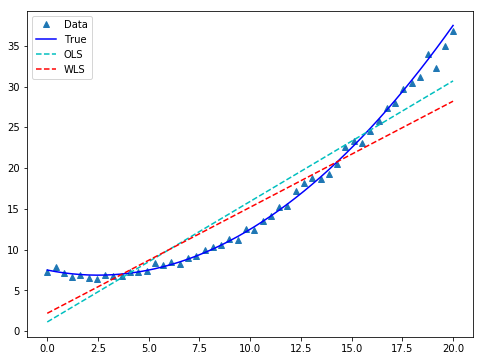

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, '^', label="Data")
ax.plot(x, y_true, 'b-', label="True")

#OLS
ax.plot(x, results_ols.fittedvalues, 'c--', label="OLS")

#WLS
ax.plot(x, results_wls_w.fittedvalues, 'r--', label="WLS")

ax.legend(loc="best");